# Electron Tag and Probe using the J/psi meson

- Repository: https://github.com/ku-cms/LeptonStudies
- CERN SWAN platform: https://swan.cern.ch/
- CERN SWAN info: https://swan.web.cern.ch/swan/
- NANO AOD documentation page: https://cms-nanoaod-integration.web.cern.ch/autoDoc/
- CMS Data Aggregation System (DAS): https://cmsweb.cern.ch/das/

In [1]:
# import libraries
import uproot
from glob import glob
import awkward as ak
import numpy as np
from coffea.nanoevents import NanoEventsFactory

# plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep

# set up mplhep
mplhep.style.use(mplhep.style.CMS)

# print coffea version
import coffea
print(f"coffea version:")
print(coffea.__version__)

coffea version:
0.7.21


In [2]:
# run this again to make sure the figure size updates (a known bug)
mplhep.style.use(mplhep.style.CMS)

In [3]:
# Load dataset files

base_directory = "/eos/user/c/caleb/CMS/datasets"

# Data (Muon trigger)
data_files = sorted(glob(f"{base_directory}/2023_Data/Muon0_Run2023C-22Sep2023_v1-v1_NANOAOD/*.root"))

n_data_files = len(data_files)
example_data_file = data_files[0]
open_data_file = uproot.open(example_data_file)

print("Number of Muon Data files: {0}".format(n_data_files))
print("Example data file path:")
print(example_data_file)
print("Example data file info:")
dict(open_data_file)

Number of Muon Data files: 90
Example data file path:
/eos/user/c/caleb/CMS/datasets/2023_Data/Muon0_Run2023C-22Sep2023_v1-v1_NANOAOD/01e84393-6b2e-4d57-87a4-f71475c051a2.root
Example data file info:


{'tag;1': <TObjString 'untagged' at 0x7f5a74548ba0>,
 'Events;1': <TTree 'Events' (1623 branches) at 0x7f5a8463f370>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (5 branches) at 0x7f5a744f2430>,
 'Runs;1': <TTree 'Runs' (1 branches) at 0x7f5a6a9acf40>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7f5a744f2280>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7f5a8463f3a0>}

In [4]:
# Create NanoEventsFactory objects
data_events = NanoEventsFactory.from_root(example_data_file).events()

In [9]:
# Print:
# - number of events
# - number of low pt electrons
# - number of electrons
# - number of muons

# variables
n_events           = 0
n_low_pt_electrons = 0
n_electrons        = 0
n_muons            = 0

# Data
n_events           = len(data_events.run)
n_low_pt_electrons = len(ak.flatten(data_events.LowPtElectron))
n_electrons        = len(ak.flatten(data_events.Electron))
n_muons            = len(ak.flatten(data_events.Muon))

# per event (on average)
n_low_pt_electrons_per_event = n_low_pt_electrons / n_events
n_electrons_per_event        = n_electrons / n_events
n_muons_per_event            = n_muons / n_events

print("Sample: Muon Data 2023")
print(" - Number of events: {0}".format(n_events))
print(" - Number of low pt electrons: total = {0}, per event (avg.) = {1:.2f}".format(n_low_pt_electrons, n_low_pt_electrons_per_event))
print(" - Number of electrons: total = {0}, per event (avg.) = {1:.2f}".format(n_electrons, n_electrons_per_event))
print(" - Number of muons: total = {0}, per event (avg.) = {1:.2f}".format(n_muons, n_muons_per_event))


Sample: Muon Data 2023
 - Number of events: 1032791
 - Number of low pt electrons: total = 488062, per event (avg.) = 0.47
 - Number of electrons: total = 254635, per event (avg.) = 0.25
 - Number of muons: total = 1822803, per event (avg.) = 1.76


(array([4.0000e+00, 4.0000e+00, 8.0000e+00, 7.0000e+00, 7.0000e+00,
        6.0000e+00, 8.0000e+00, 1.1000e+01, 1.1000e+01, 1.1000e+01,
        1.6000e+01, 1.8000e+01, 1.9000e+01, 1.7000e+01, 1.1000e+01,
        1.9000e+01, 1.7000e+01, 2.2000e+01, 3.0000e+01, 3.3000e+01,
        3.2000e+01, 3.8000e+01, 5.6000e+01, 8.0000e+01, 1.1600e+02,
        4.0790e+03, 2.3855e+04, 2.7411e+04, 2.6523e+04, 2.9840e+04,
        3.1114e+04, 3.1360e+04, 3.0622e+04, 3.3909e+04, 3.6127e+04,
        4.0688e+04, 4.3818e+04, 4.7165e+04, 4.7916e+04, 4.6844e+04,
        4.3751e+04, 4.2109e+04, 4.2562e+04, 4.1170e+04, 4.0391e+04,
        4.1467e+04, 4.1186e+04, 3.3722e+04, 3.6959e+04, 4.1007e+04,
        4.0752e+04, 3.7056e+04, 3.4153e+04, 4.1637e+04, 4.2269e+04,
        4.0935e+04, 4.1405e+04, 4.2885e+04, 4.2896e+04, 4.5367e+04,
        4.7354e+04, 4.8497e+04, 4.7681e+04, 4.4258e+04, 4.0299e+04,
        3.6550e+04, 3.4279e+04, 3.1342e+04, 3.2384e+04, 3.1303e+04,
        2.9388e+04, 2.6802e+04, 2.7880e+04, 2.44

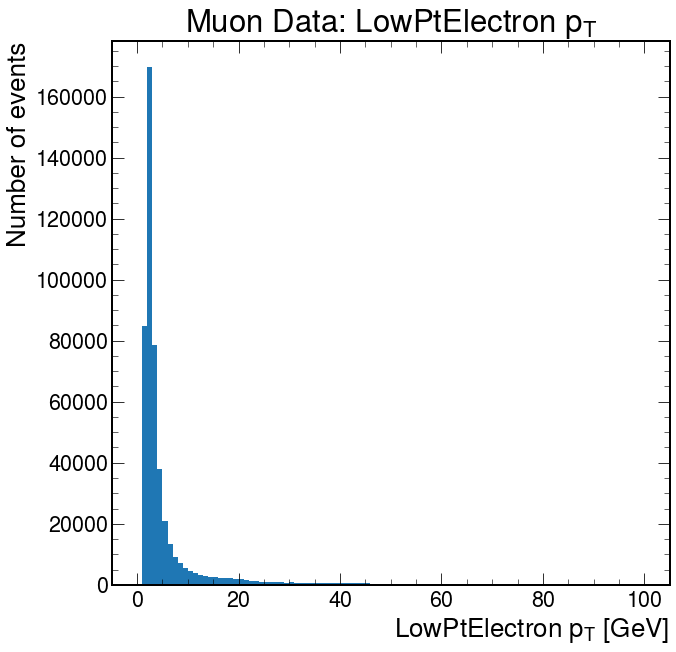

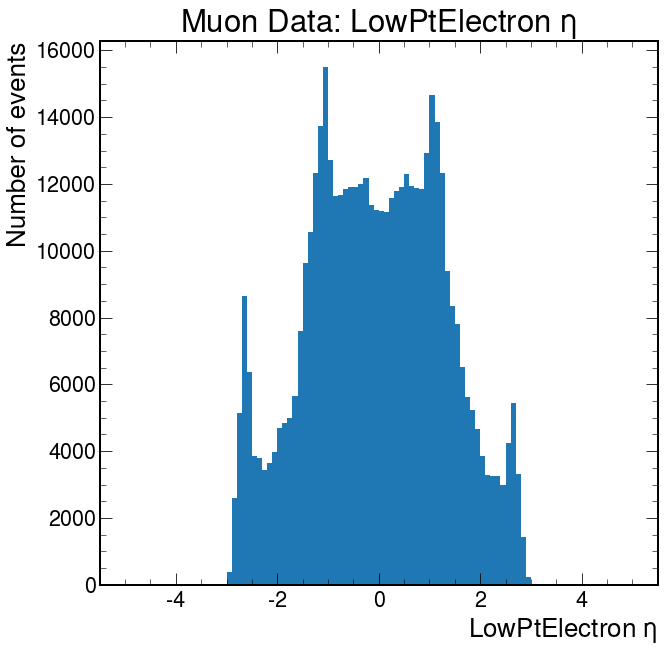

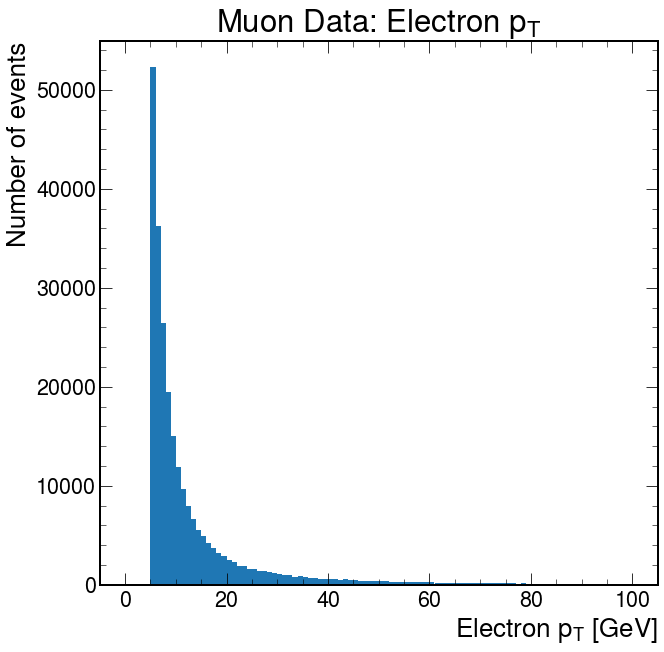

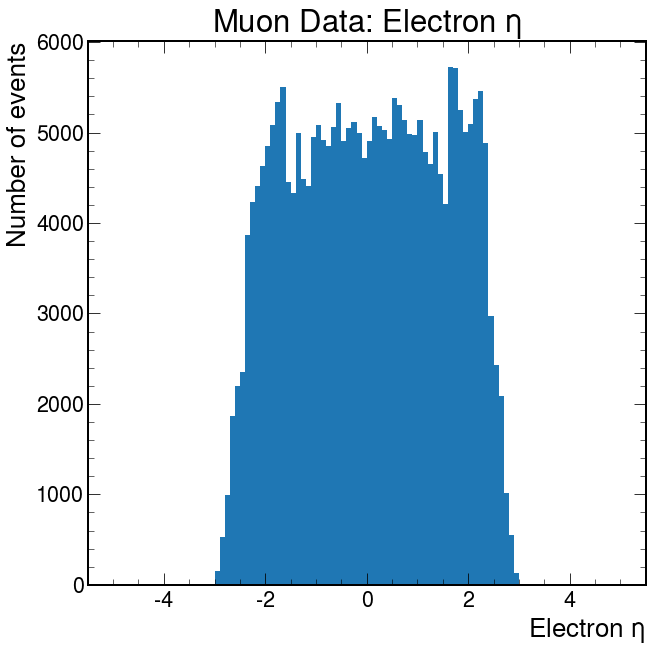

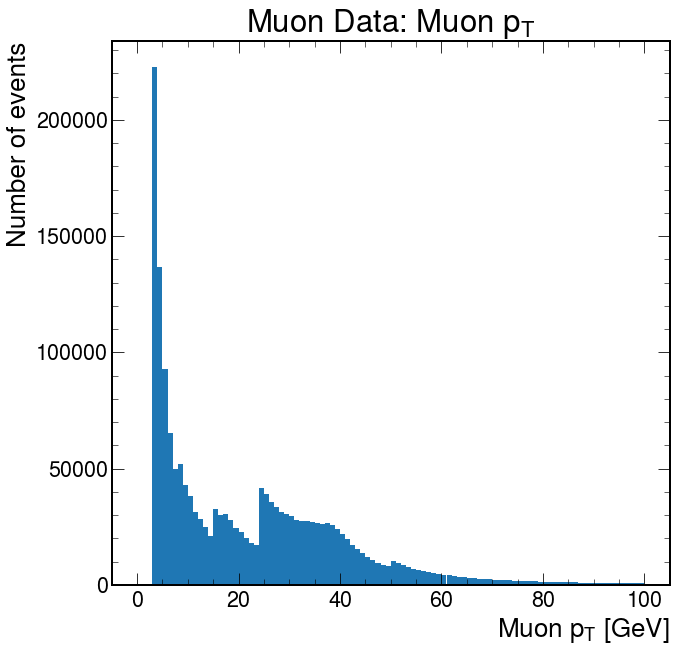

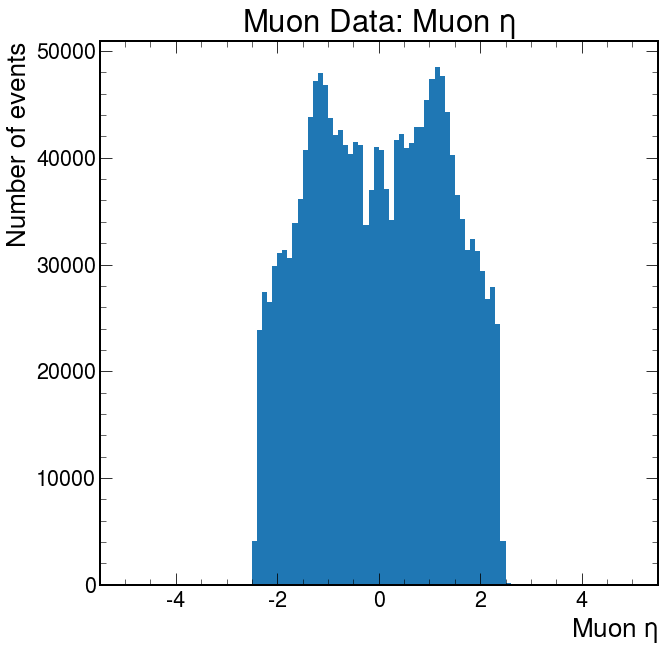

In [10]:
# Muon Data

# LowPtElectron pT
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: LowPtElectron $p_{T}$")
ax.set_xlabel(r"LowPtElectron $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.LowPtElectron.pt), bins=np.linspace(0, 100, 101))

# LowPtElectron eta
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: LowPtElectron $\eta$")
ax.set_xlabel(r"LowPtElectron $\eta$")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.LowPtElectron.eta), bins=np.linspace(-5, 5, 101))

# Electron pT
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Electron $p_{T}$")
ax.set_xlabel(r"Electron $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.pt), bins=np.linspace(0, 100, 101))

# Electron eta
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Electron $\eta$")
ax.set_xlabel(r"Electron $\eta$")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.eta), bins=np.linspace(-5, 5, 101))

# Muon pT
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Muon $p_{T}$")
ax.set_xlabel(r"Muon $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Muon.pt), bins=np.linspace(0, 100, 101))

# Muon eta
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Muon $\eta$")
ax.set_xlabel(r"Muon $\eta$")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Muon.eta), bins=np.linspace(-5, 5, 101))


(array([  3604.,   4055.,   4620.,   5298.,   6017.,   6869.,   7685.,
          8611.,   9581.,  10562.,  11633.,  12646.,  13687.,  14723.,
         15539.,  16585.,  17275.,  18049.,  19460., 652826., 646946.,
         19959.,  18068.,  17269.,  16420.,  15756.,  14591.,  13596.,
         12584.,  11441.,  10367.,   9466.,   8585.,   7737.,   6910.,
          6090.,   5246.,   4800.,   4103.,   3640.]),
 array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
         -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
         -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
          3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
          8. ,   8.5,   9. ,   9.5,  10. ]),
 <BarContainer object of 40 artists>)

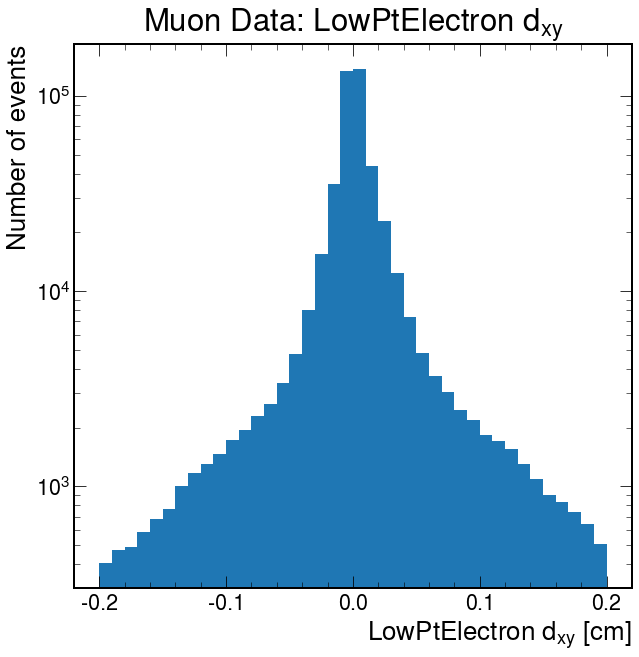

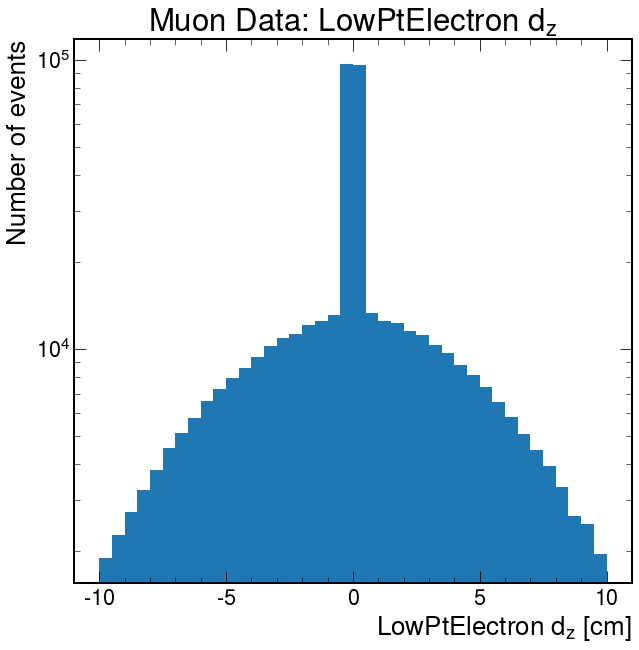

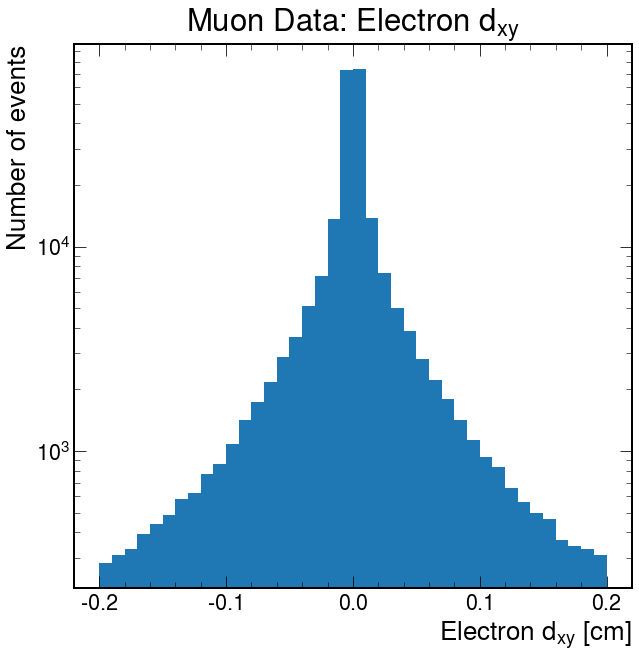

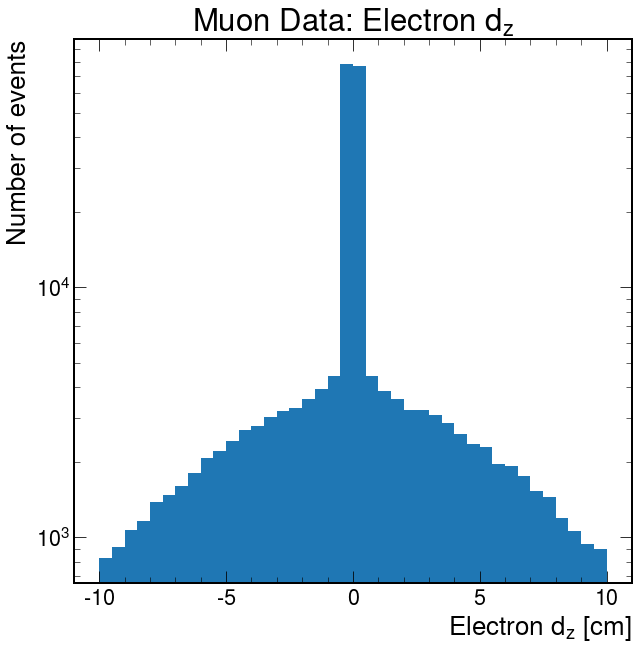

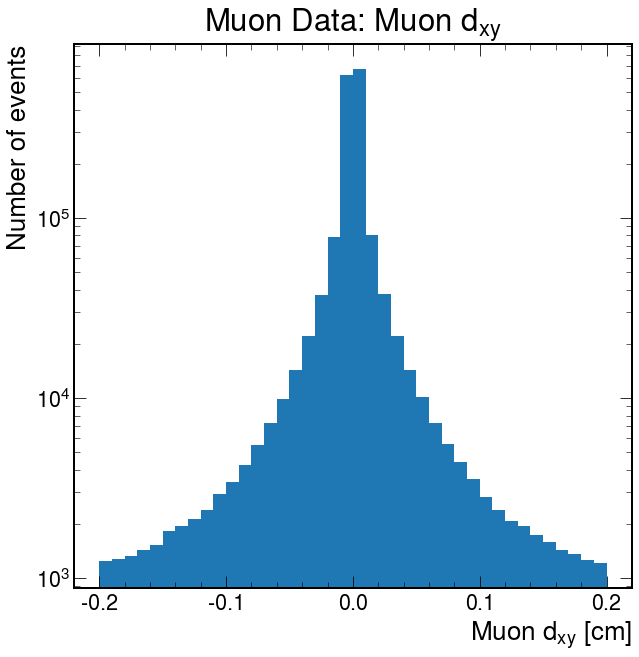

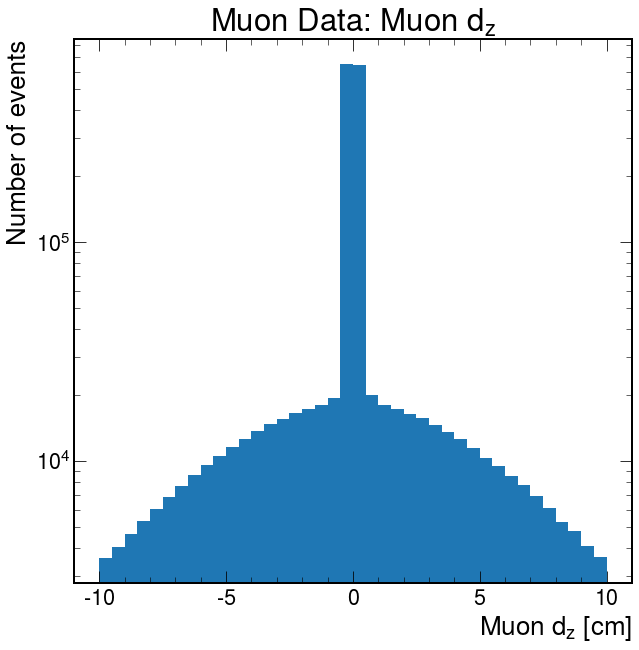

In [16]:
# Muon Data

# LowPtElectron dxy
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: LowPtElectron $d_{xy}$")
ax.set_xlabel(r"LowPtElectron $d_{xy}$ [cm]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.LowPtElectron.dxy), bins=np.linspace(-0.20, 0.20, 41), log=True)

# LowPtElectron dz
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: LowPtElectron $d_{z}$")
ax.set_xlabel(r"LowPtElectron $d_{z}$ [cm]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.LowPtElectron.dz), bins=np.linspace(-10.0, 10.0, 41), log=True)

# Electron dxy
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Electron $d_{xy}$")
ax.set_xlabel(r"Electron $d_{xy}$ [cm]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.dxy), bins=np.linspace(-0.20, 0.20, 41), log=True)

# Electron dz
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Electron $d_{z}$")
ax.set_xlabel(r"Electron $d_{z}$ [cm]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.dz), bins=np.linspace(-10.0, 10.0, 41), log=True)

# Muon dxy
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Muon $d_{xy}$")
ax.set_xlabel(r"Muon $d_{xy}$ [cm]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Muon.dxy), bins=np.linspace(-0.20, 0.20, 41), log=True)

# Muon dz
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Muon $d_{z}$")
ax.set_xlabel(r"Muon $d_{z}$ [cm]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Muon.dz), bins=np.linspace(-10.0, 10.0, 41), log=True)


/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


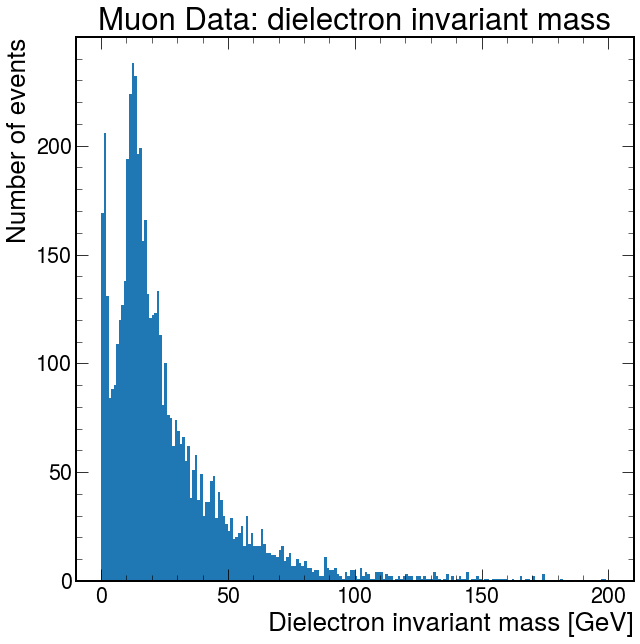

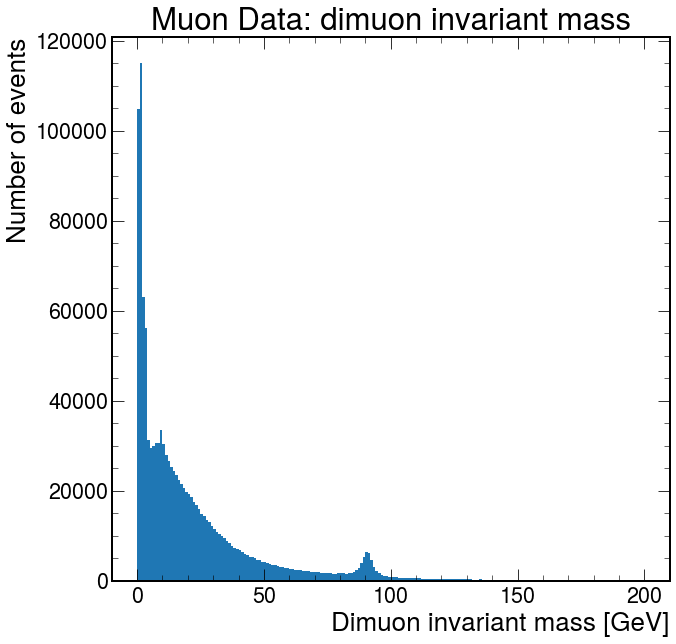

In [8]:
# dilepton mass plots

# Full range
mass_min = 0
mass_max = 200
mass_nbins = 200

# Z mass peak
# mass_min = 50
# mass_max = 130
# mass_nbins = 80

# J/psi mass peak
# mass_min = 3.0
# mass_max = 3.5
# mass_nbins = 100

# Muon Data
# electrons: dielectron mass
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: dielectron invariant mass")
ax.set_xlabel(r"Dielectron invariant mass [GeV]")
ax.set_ylabel(r"Number of events")
#event_cut = ak.all(data_events.Electron.r9 > 0.96, axis=1)
event_cut = ak.all(abs(data_events.Electron.dz) > 0.5, axis=1)
#ee = ak.combinations(data_events.Electron, 2, fields = ["e0", "e1"])
ee = ak.combinations(data_events[event_cut].Electron, 2, fields=["e0", "e1"])
mass = (ee.e0 + ee.e1).mass
ax.hist(ak.flatten(mass), bins=np.linspace(mass_min, mass_max, mass_nbins + 1));

# Muon Data
# muons: dimuon mass
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: dimuon invariant mass")
ax.set_xlabel(r"Dimuon invariant mass [GeV]")
ax.set_ylabel(r"Number of events")
mm = ak.combinations(data_events.Muon, 2, fields = ["m0", "m1"])
mass = (mm.m0 + mm.m1).mass
ax.hist(ak.flatten(mass), bins=np.linspace(mass_min, mass_max, mass_nbins + 1));